In [2]:
import utility as ut
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

In [3]:
# # load in data
# df = ut.make_big_df()
# df = ut.process(df)
# df = df.dropna().reset_index(drop=True)

# X = df.drop(columns=['Play Type']).to_numpy()
# y = df['Play Type'].to_numpy()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # make model
# mlp = MLPClassifier(hidden_layer_sizes=[20], activation='logistic', solver='sgd',
#                     alpha=0, batch_size=1, learning_rate_init=.01, shuffle=True,
#                     momentum=0, n_iter_no_change=50, max_iter=1000)
# mlp.fit(X_train, y_train)

# num_itr = mlp.n_iter_

# # training set acc
# train_pred = mlp.predict(X_train)
# # train_acc = accuracy_score(y_train, train_pred)
# train_acc = mlp.score(X_train, y_train)

# # test set acc
# test_pred = mlp.predict(X_test)
# # test_acc = accuracy_score(y_test, test_pred)
# test_acc = mlp.score(X_test, y_test)

# print("Number of Iterations until Convergence:", num_itr)
# print("Training Set Accuracy:", train_acc)
# print("Test Set Accuracy:", test_acc)

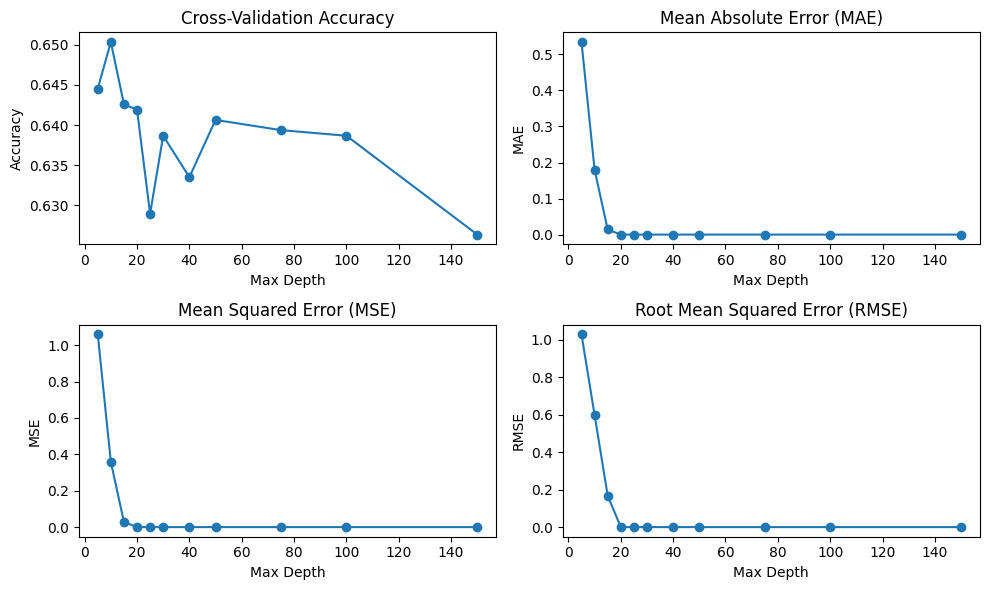

In [9]:
df = ut.make_big_df()
df = ut.process(df)
df = df.dropna().reset_index(drop=True)

X = df.drop(columns=['Play Type']).to_numpy()
y = df['Play Type'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)

# Define a range of max depths to test
max_depths_to_test = [5, 10, 15, 20, 25, 30, 40, 50, 75, 100, 150]

# Lists to store results
cv_accuracies = []
mae_values = []
mse_values = []
rmse_values = []

# Loop through different max depths
for max_depth in max_depths_to_test:
    # Create and train the model with cross-validation
    clf = RandomForestClassifier(max_depth=max_depth)
    rand_forest_cv = cross_val_score(clf, X_train, y_train, cv=20)
    mean_cv_accuracy = rand_forest_cv.mean()
    
    # Train on all data now that we have done CV
    clf.fit(X, y)
    
    # Make predictions and calculate evaluation metrics
    y_pred = clf.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    
    # Append results to lists
    cv_accuracies.append(mean_cv_accuracy)
    mae_values.append(mae)
    mse_values.append(mse)
    rmse_values.append(rmse)

# Plot the results
plt.figure(figsize=(10, 6))



# Plot Cross-Validation Accuracy
plt.subplot(2, 2, 1)
plt.plot(max_depths_to_test, cv_accuracies, marker='o')
plt.title('Cross-Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

# Plot MAE
plt.subplot(2, 2, 2)
plt.plot(max_depths_to_test, mae_values, marker='o')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Max Depth')
plt.ylabel('MAE')

# Plot MSE
plt.subplot(2, 2, 3)
plt.plot(max_depths_to_test, mse_values, marker='o')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Max Depth')
plt.ylabel('MSE')

# Plot RMSE
plt.subplot(2, 2, 4)
plt.plot(max_depths_to_test, rmse_values, marker='o')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

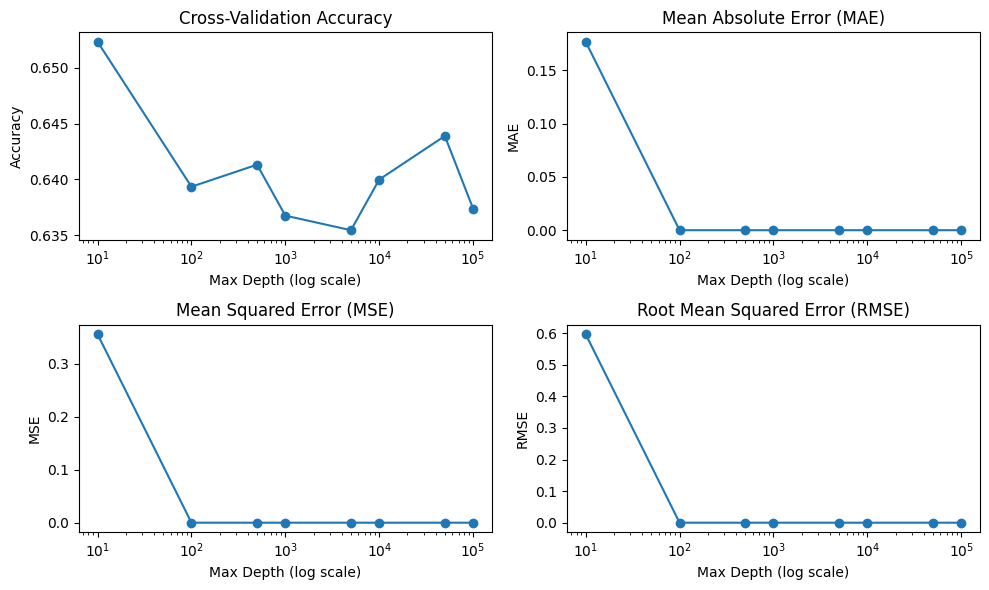

In [10]:
df = ut.make_big_df()
df = ut.process(df)
df = df.dropna().reset_index(drop=True)

X = df.drop(columns=['Play Type']).to_numpy()
y = df['Play Type'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)

# Define a range of max depths to test
max_depths_to_test = [10, 100, 500, 1000, 5000, 10000, 50000, 100000]

# Lists to store results
cv_accuracies = []
mae_values = []
mse_values = []
rmse_values = []

# Loop through different max depths
for max_depth in max_depths_to_test:
    # Create and train the model with cross-validation
    clf = RandomForestClassifier(max_depth=max_depth)
    rand_forest_cv = cross_val_score(clf, X_train, y_train, cv=20)
    mean_cv_accuracy = rand_forest_cv.mean()
    
    # Train on all data now that we have done CV
    clf.fit(X, y)
    
    # Make predictions and calculate evaluation metrics
    y_pred = clf.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    
    # Append results to lists
    cv_accuracies.append(mean_cv_accuracy)
    mae_values.append(mae)
    mse_values.append(mse)
    rmse_values.append(rmse)


# Plot the results on a log scale
plt.figure(figsize=(10, 6))

# Plot Cross-Validation Accuracy
plt.subplot(2, 2, 1)
plt.plot(max_depths_to_test, cv_accuracies, marker='o')
plt.xscale('log')  # Set x-axis to log scale
plt.title('Cross-Validation Accuracy')
plt.xlabel('Max Depth (log scale)')
plt.ylabel('Accuracy')

# Plot MAE
plt.subplot(2, 2, 2)
plt.plot(max_depths_to_test, mae_values, marker='o')
plt.xscale('log')  # Set x-axis to log scale
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Max Depth (log scale)')
plt.ylabel('MAE')

# Plot MSE
plt.subplot(2, 2, 3)
plt.plot(max_depths_to_test, mse_values, marker='o')
plt.xscale('log')  # Set x-axis to log scale
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Max Depth (log scale)')
plt.ylabel('MSE')

# Plot RMSE
plt.subplot(2, 2, 4)
plt.plot(max_depths_to_test, rmse_values, marker='o')
plt.xscale('log')  # Set x-axis to log scale
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Max Depth (log scale)')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()